# Séries temporais em bases financeiras - Facebook Prophet


## Instalação e importação das bibliotecas

In [64]:
#!pip install pmdarima

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import yfinance as yf
from fbprophet import Prophet

## Carregamento da base de dados

In [66]:
nome = 'VALE3'

In [67]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataset = pd.read_csv('acoes.csv', parse_dates=['Date'], index_col='Date',
                      date_parser = dateparse, usecols = ['Date', nome])

In [68]:
dataset

,VALE3
Date,
2019-12-18,53.470001
2019-12-19,54.000000
2019-12-20,54.790001
2019-12-23,54.580002
2019-12-26,54.790001
...,...
2021-11-11,68.010002
2021-11-16,66.330002
2021-11-17,65.000000


In [69]:
time_series = dataset[nome]

In [70]:
time_series

Date
2019-12-18    53.470001
2019-12-19    54.000000
2019-12-20    54.790001
2019-12-23    54.580002
2019-12-26    54.790001
                ...    
2021-11-11    68.010002
2021-11-16    66.330002
2021-11-17    65.000000
2021-11-18    62.330002
2021-11-19    64.029999
Name: VALE3, Length: 464, dtype: float64

In [71]:
nome = time_series.name

## Exploração da série temporal

In [72]:
time_series[1]

54.0

In [73]:
menor_data = min(time_series.index)
maior_data = max(time_series.index)

In [74]:
time_series[menor_data]

53.470001220703125

In [75]:
time_series[menor_data: maior_data]

Date
2019-12-18    53.470001
2019-12-19    54.000000
2019-12-20    54.790001
2019-12-23    54.580002
2019-12-26    54.790001
                ...    
2021-11-11    68.010002
2021-11-16    66.330002
2021-11-17    65.000000
2021-11-18    62.330002
2021-11-19    64.029999
Name: VALE3, Length: 464, dtype: float64

In [76]:
time_series[:'2015-07-31']

Series([], Name: VALE3, dtype: float64)

In [77]:
time_series['2021']

Date
2021-01-04     91.459999
2021-01-05     93.000000
2021-01-06     96.050003
2021-01-07    102.320000
2021-01-08    102.000000
                 ...    
2021-11-11     68.010002
2021-11-16     66.330002
2021-11-17     65.000000
2021-11-18     62.330002
2021-11-19     64.029999
Name: VALE3, Length: 210, dtype: float64

In [78]:
time_series.index.max()

Timestamp('2021-11-19 00:00:00')

In [79]:
time_series.index.min()

Timestamp('2019-12-18 00:00:00')

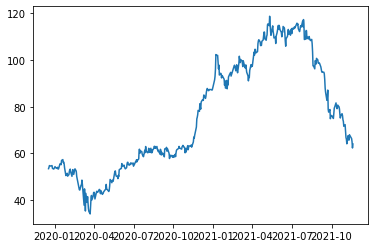

In [80]:
plt.plot(time_series);

In [81]:
figura = px.line(title='Histórico do preço das ações')
figura.add_scatter(x = time_series.index, y = time_series)

In [82]:
time_series_datas = time_series

In [83]:
time_series_datas

Date
2019-12-18    53.470001
2019-12-19    54.000000
2019-12-20    54.790001
2019-12-23    54.580002
2019-12-26    54.790001
                ...    
2021-11-11    68.010002
2021-11-16    66.330002
2021-11-17    65.000000
2021-11-18    62.330002
2021-11-19    64.029999
Name: VALE3, Length: 464, dtype: float64

Text(0.5, 1.0, 'Ação - VALE3')

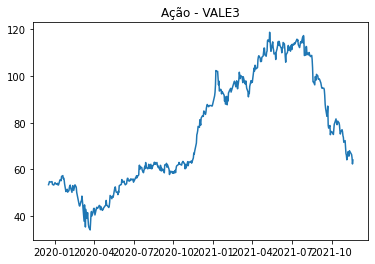

In [84]:
plt.plot(time_series_datas);
plt.title('Ação - '+ nome)

## Decomposição da série temporal

In [85]:
type(time_series)

pandas.core.series.Series

In [86]:
len(time_series) / 2

232.0

In [87]:
decomposicao = seasonal_decompose(time_series, period=len(time_series) // 2)

In [88]:
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

Text(0.5, 1.0, 'Ação - VALE3')

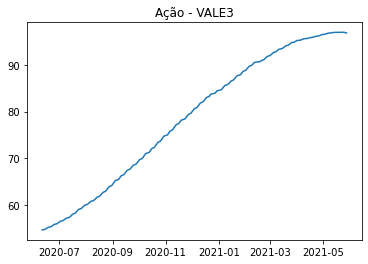

In [89]:
plt.plot(tendencia);
plt.title('Ação - '+ nome)

Text(0.5, 1.0, 'Ação - VALE3')

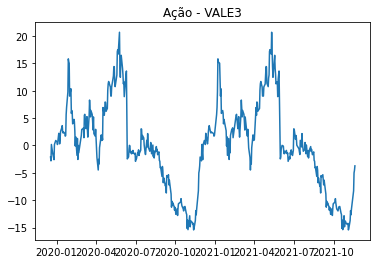

In [90]:
plt.plot(sazonal);
plt.title('Ação - '+ nome)

Text(0.5, 1.0, 'Ação - VALE3')

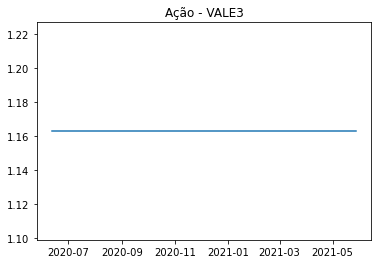

In [91]:
plt.plot(aleatorio);
plt.title('Ação - '+ nome)

## Gráfico das previsões

In [92]:
len(time_series)

464

In [103]:
treinamento = time_series[:300]
treinamento.shape

(300,)

In [104]:
treinamento.index.min(), treinamento.index.max()

(Timestamp('2019-12-18 00:00:00'), Timestamp('2021-03-17 00:00:00'))

In [105]:
teste = time_series[300:]
teste.shape

(164,)

In [106]:
teste.index.min(), teste.index.max()

(Timestamp('2021-03-18 00:00:00'), Timestamp('2021-11-19 00:00:00'))

In [107]:
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [108]:
teste.index

DatetimeIndex(['2021-03-18', '2021-03-19', '2021-03-22', '2021-03-23',
               '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29',
               '2021-03-30', '2021-03-31',
               ...
               '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11', '2021-11-16', '2021-11-17',
               '2021-11-18', '2021-11-19'],
              dtype='datetime64[ns]', name='Date', length=164, freq=None)

In [110]:
previsoes = pd.DataFrame(modelo2.predict(n_periods=164), index=teste.index)
previsoes.columns = ['previsoes']
previsoes

,previsoes
Date,
2021-03-18,97.803483
2021-03-19,97.999186
2021-03-22,98.137444
2021-03-23,98.286994
2021-03-24,98.434325
...,...
2021-11-11,121.327148
2021-11-16,121.474844
2021-11-17,121.622539


In [111]:
teste

Date
2021-03-18    96.160004
2021-03-19    94.779999
2021-03-22    93.209999
2021-03-23    91.059998
2021-03-24    93.150002
                ...    
2021-11-11    68.010002
2021-11-16    66.330002
2021-11-17    65.000000
2021-11-18    62.330002
2021-11-19    64.029999
Name: VALE3, Length: 164, dtype: float64

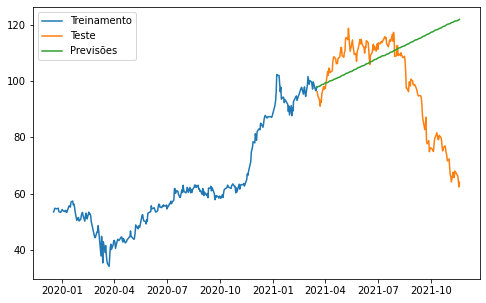

In [112]:
plt.figure(figsize=(8,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')
plt.legend();

## Carregamento da base de dados

In [113]:
dataset = pd.read_csv('acoes.csv', usecols=['Date', nome])
dataset

,Date,VALE3
0,2019-12-18,53.470001
1,2019-12-19,54.000000
2,2019-12-20,54.790001
3,2019-12-23,54.580002
4,2019-12-26,54.790001
...,...,...
459,2021-11-11,68.010002
460,2021-11-16,66.330002
461,2021-11-17,65.000000
462,2021-11-18,62.330002


In [114]:
dataset = dataset[['Date', nome]].rename(columns = {'Date': 'ds', nome: 'y'})
dataset

,ds,y
0,2019-12-18,53.470001
1,2019-12-19,54.000000
2,2019-12-20,54.790001
3,2019-12-23,54.580002
4,2019-12-26,54.790001
...,...,...
459,2021-11-11,68.010002
460,2021-11-16,66.330002
461,2021-11-17,65.000000
462,2021-11-18,62.330002


## Construção do modelo e previsões

In [115]:
modelo = Prophet()
modelo.fit(dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [116]:
futuro = modelo.make_future_dataframe(periods=90)
previsoes = modelo.predict(futuro)

In [117]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-18,56.154599,52.224101,62.235898,56.154599,56.154599,0.846428,0.846428,0.846428,0.846428,0.846428,0.846428,0.0,0.0,0.0,57.001027
1,2019-12-19,56.011985,51.228789,61.043422,56.011985,56.011985,0.335571,0.335571,0.335571,0.335571,0.335571,0.335571,0.0,0.0,0.0,56.347556
2,2019-12-20,55.869372,51.507081,61.230769,55.869372,55.869372,0.584506,0.584506,0.584506,0.584506,0.584506,0.584506,0.0,0.0,0.0,56.453877
3,2019-12-23,55.441530,51.558551,60.950670,55.441530,55.441530,0.698841,0.698841,0.698841,0.698841,0.698841,0.698841,0.0,0.0,0.0,56.140371
4,2019-12-26,55.013689,50.716357,60.090610,55.013689,55.013689,0.335571,0.335571,0.335571,0.335571,0.335571,0.335571,0.0,0.0,0.0,55.349260


In [118]:
len(dataset), len(previsoes)

(464, 554)

In [119]:
len(previsoes) - len(dataset)

90

In [120]:
previsoes.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2021-11-20,64.152415,57.971584,67.328966,64.152415,64.152415,-1.596838,-1.596838,-1.596838,-1.596838,-1.596838,-1.596838,0.0,0.0,0.0,62.555577
465,2021-11-21,63.779954,57.493395,66.836003,63.779954,63.779954,-1.596838,-1.596838,-1.596838,-1.596838,-1.596838,-1.596838,0.0,0.0,0.0,62.183116
466,2021-11-22,63.407493,59.482441,69.148172,63.407493,63.407493,0.698841,0.698841,0.698841,0.698841,0.698841,0.698841,0.0,0.0,0.0,64.106334
467,2021-11-23,63.035032,58.956369,68.901284,63.035032,63.035032,0.728331,0.728331,0.728331,0.728331,0.728331,0.728331,0.0,0.0,0.0,63.763363
468,2021-11-24,62.662571,58.533727,68.430806,62.662571,62.662571,0.846428,0.846428,0.846428,0.846428,0.846428,0.846428,0.0,0.0,0.0,63.508999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2022-02-13,32.493232,22.304073,40.114653,25.152221,39.944451,-1.596838,-1.596838,-1.596838,-1.596838,-1.596838,-1.596838,0.0,0.0,0.0,30.896394
550,2022-02-14,32.120771,23.761286,42.090768,24.553395,39.735895,0.698841,0.698841,0.698841,0.698841,0.698841,0.698841,0.0,0.0,0.0,32.819612
551,2022-02-15,31.748310,23.348305,41.989338,24.000604,39.553152,0.728331,0.728331,0.728331,0.728331,0.728331,0.728331,0.0,0.0,0.0,32.476642
552,2022-02-16,31.375849,22.546525,40.702605,23.477535,39.359952,0.846428,0.846428,0.846428,0.846428,0.846428,0.846428,0.0,0.0,0.0,32.222278


## Gráfico das previsões

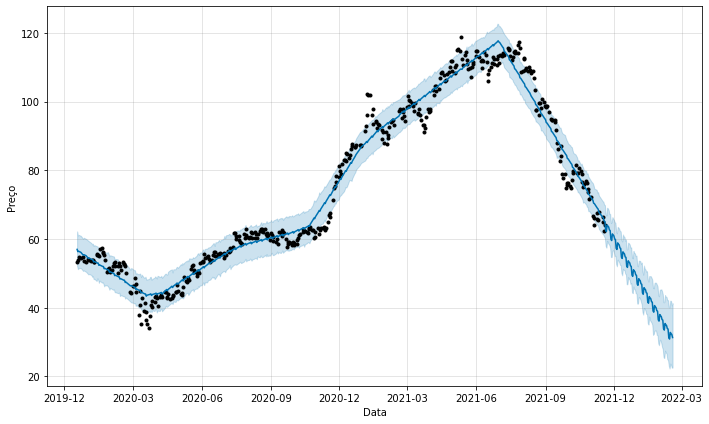

In [121]:
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');

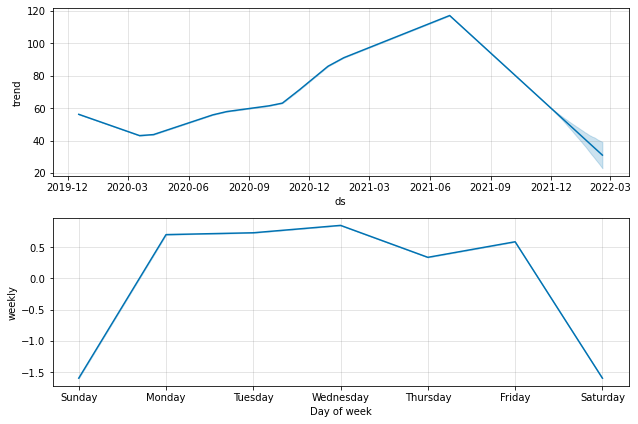

In [122]:
modelo.plot_components(previsoes);

In [123]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [124]:
plot_plotly(modelo, previsoes)

In [125]:
plot_components_plotly(modelo, previsoes)

## Avaliação

In [126]:
teste.shape

(164,)

In [127]:
teste.tail()

Date
2021-11-11    68.010002
2021-11-16    66.330002
2021-11-17    65.000000
2021-11-18    62.330002
2021-11-19    64.029999
Name: VALE3, dtype: float64

In [128]:
pred = modelo.make_future_dataframe(periods=0)
previsoes = modelo.predict(pred)

In [129]:
previsoes.shape

(464, 16)

In [130]:
previsoes.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
459,2021-11-11,67.504564,63.068220,72.342331,67.504564,67.504564,0.335571,0.335571,0.335571,0.335571,0.335571,0.335571,0.0,0.0,0.0,67.840135
460,2021-11-16,65.642259,61.715724,71.414814,65.642259,65.642259,0.728331,0.728331,0.728331,0.728331,0.728331,0.728331,0.0,0.0,0.0,66.370590
461,2021-11-17,65.269798,61.280005,70.744140,65.269798,65.269798,0.846428,0.846428,0.846428,0.846428,0.846428,0.846428,0.0,0.0,0.0,66.116226
462,2021-11-18,64.897337,60.520290,69.858373,64.897337,64.897337,0.335571,0.335571,0.335571,0.335571,0.335571,0.335571,0.0,0.0,0.0,65.232908
463,2021-11-19,64.524876,60.560888,69.940891,64.524876,64.524876,0.584506,0.584506,0.584506,0.584506,0.584506,0.584506,0.0,0.0,0.0,65.109381


In [131]:
previsoes = previsoes['yhat'].tail(365)

In [132]:
previsoes

99     49.820263
100    50.074280
101    49.699343
102    50.084197
103    50.606292
         ...    
459    67.840135
460    66.370590
461    66.116226
462    65.232908
463    65.109381
Name: yhat, Length: 365, dtype: float64

In [62]:
mean_absolute_error(teste, previsoes)

NameError: name 'mean_absolute_error' is not defined